<a href="https://colab.research.google.com/github/VMarcell/Basic_ML/blob/main/ZH_A_ipynb_m%C3%A1solata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bevezetés az adattudományba - gyakorlati zárthelyi dolgozat

A zárthelyi során a Autók árait (Price) kell majd megprediktálni. A zárthelyi dolgozatot a kiadott notebook-ban kell megoldani és ebben a formában kell visszatölteni. A fájl nevét módosítsd a következőre: GipszJakab_ABC123. A zárthelyi megoldására 60 perc áll rendelkezésre.   

## Feladatok:
1. Adatbeolvasás:  
1.1 Olvasd be az adatot egy dataframe-be, és jelenítsed meg az első 5 sorát. 1p   
1.2 3-4 mondatban írd le az adathalmazt, milyen oszlopaink vannak és miket jelenthetnek. 4p    
  
2. Adat műveletek:   
2.1 Töröld az következő oszlopokat: ColourExtInt, CylindersinEngine, Title 1p
2.2 Nézde meg hogy oszloponként hány hiányzó adat van a dataframe-ben. 1p  
2.3 A Location oszlop hiányzó adatait töltsed fel "Unknown" értékkel. 1p   
2.4 Töröld azokat a sorokat ahol bármelyik adat hiányzik. 1p  
2.5 Néhány mondatban írd le, hogy a törlésen kívül milyen más módszereket lehet használni a hiányzó adatok kezelésére.  2p  
2.6 Készíts egy új oszlopot Age néven. A Year oszlop segítségével számold ki az autók korát. (2023-ból vond ki az értékeket) 2p.    
2.7 Töröld a Year oszlopot. 1p.
  
3. Adat vizualizáció:  
3.1 Jelenítsd meg, hány darab autó van az egyes Age kategóriákban . Az X tengelyen szerepeljen az Age, Y tengelyen pedig az autók mennyisége. 3p   
3.2 Jelenítsd meg egy kör diagramon, hogy milyen arányban vannak használt és új autók az adatok között. Használd a UsedOrNew oszlopot. A diagramhoz készíts magyarázatot, melyik szelet melyik és szerepeljen rajta a százalék is. 3p  

4. Modell tanítás:  
4.1 Konvertáld szám értékekké azon oszlopok érétkeit ahol jelenleg szöveges adat van. 1p   
4.2 Készíts egy X és egy y változót. X-ben szerepeljenek az autókhoz tartózó feature-ok, y-ban pedig a hozzájuk tartozó ár. 1p   
4.3 Bontsd fel az adathalmazt tanító és teszt részhalmazra. Az adatok 80%-a legyen tanító adat, 20%-a pedig teszt. 1p  
4.4 Taníts fel egy random forest-et. Használd hozzá a következő import-ot: 'from sklearn.ensemble import RandomForestRegressor' 1p  
4.5 A RF kívül még milyen más modelt lehetett volna használni? Hogyan kellett volna módosítani az adathalmazunkat? 2p  

5. Értékelés:  
5.1 Értékeld a modelled teljesítményét és pontosságát. 2p    
5.2 Milyen lépéseket lehetne még megtenni a jobb pontosság elérése érdekében? 3p

6. Extra feladat:   
6.1 Random keresés segítségével próbálj meg javítani az elért pontosságon. Jelenítsed meg melyek lettek a legjobb parméterek és mennyivel jobb eredményt sikerült ezekkel elérni.

SUM: 30p

In [ ]:
#imports
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns

# 1. feladat
### 1.1 feladat:

In [ ]:
df = pd.read_csv('vehicle_prices.csv')

print(df.head(5))

           Brand    Year   Model               Car/Suv  \
0      Ssangyong  2022.0  Rexton  Sutherland Isuzu Ute   
1             MG  2022.0     MG3             Hatchback   
2            BMW  2022.0    430I                 Coupe   
3  Mercedes-Benz  2011.0    E500                 Coupe   
4        Renault  2022.0  Arkana                   SUV   

                                       Title UsedOrNew Transmission  \
0       2022 Ssangyong Rexton Ultimate (awd)      DEMO    Automatic   
1  2022 MG MG3 Auto Excite (with Navigation)      USED    Automatic   
2                      2022 BMW 430I M Sport      USED    Automatic   
3           2011 Mercedes-Benz E500 Elegance      USED    Automatic   
4                 2022 Renault Arkana Intens      USED    Automatic   

         Engine DriveType  FuelType FuelConsumption Kilometres   ColourExtInt  \
0  4 cyl, 2.2 L       AWD    Diesel  8.7 L / 100 km       5595  White / Black   
1  4 cyl, 1.5 L     Front   Premium  6.7 L / 100 km         16

### 1.2 feladat:
[VÁLASZ HELYE]

# 2. feladat
### 2.1 feladat:

In [ ]:
df = df.drop(['ColourExtInt', 'CylindersinEngine'], axis=1)

### 2.2 feladat:

In [ ]:
print(df.isnull().sum())

Brand                 1
Year                  1
Model                 1
Car/Suv              28
Title                 1
UsedOrNew             1
Transmission          1
Engine                1
DriveType             1
FuelType              1
FuelConsumption       1
Kilometres            1
Location            450
BodyType            282
Doors              1604
Seats              1705
Price                 3
dtype: int64


### 2.3 feladat:

In [ ]:
df['Location'] = df['Location'].fillna('Unknown')
print(df.isnull().sum())

Brand                 1
Year                  1
Model                 1
Car/Suv              28
Title                 1
UsedOrNew             1
Transmission          1
Engine                1
DriveType             1
FuelType              1
FuelConsumption       1
Kilometres            1
Location              0
BodyType            282
Doors              1604
Seats              1705
Price                 3
dtype: int64


### 2.4 feladat:

In [ ]:
df = df.dropna()
print(df.isnull().sum())

Brand              0
Year               0
Model              0
Car/Suv            0
Title              0
UsedOrNew          0
Transmission       0
Engine             0
DriveType          0
FuelType           0
FuelConsumption    0
Kilometres         0
Location           0
BodyType           0
Doors              0
Seats              0
Price              0
dtype: int64


### 2.5 feladat:
[VÁLASZ HELYE]

### 2.6 feladat:

In [ ]:
df['Age'] = 2023 - df['Year']

df = df.drop('Year', axis=1)

df

,Brand,Model,Car/Suv,Title,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,Location,BodyType,Doors,Seats,Price,Age
0,Ssangyong,Rexton,Sutherland Isuzu Ute,2022 Ssangyong Rexton Ultimate (awd),DEMO,Automatic,"4 cyl, 2.2 L",AWD,Diesel,8.7 L / 100 km,5595,"Caringbah, NSW",SUV,4 Doors,7 Seats,51990,1.0
1,MG,MG3,Hatchback,2022 MG MG3 Auto Excite (with Navigation),USED,Automatic,"4 cyl, 1.5 L",Front,Premium,6.7 L / 100 km,16,"Brookvale, NSW",Hatchback,5 Doors,5 Seats,19990,1.0
2,BMW,430I,Coupe,2022 BMW 430I M Sport,USED,Automatic,"4 cyl, 2 L",Rear,Premium,6.6 L / 100 km,8472,"Sylvania, NSW",Coupe,2 Doors,4 Seats,108988,1.0
3,Mercedes-Benz,E500,Coupe,2011 Mercedes-Benz E500 Elegance,USED,Automatic,"8 cyl, 5.5 L",Rear,Premium,11 L / 100 km,136517,"Mount Druitt, NSW",Coupe,2 Doors,4 Seats,32990,12.0
4,Renault,Arkana,SUV,2022 Renault Arkana Intens,USED,Automatic,"4 cyl, 1.3 L",Front,Unleaded,6 L / 100 km,1035,"Castle Hill, NSW",SUV,4 Doors,5 Seats,34990,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16727,Hyundai,I30,Wagon,2015 Hyundai I30 Tourer Active 1.6 GDI,USED,Automatic,"4 cyl, 1.6 L",Front,Unleaded,6.9 L / 100 km,54359,"Oakleigh South, VIC",Wagon,4 Doors,5 Seats,21450,8.0
16728,Nissan,Qashqai,SUV,2021 Nissan Qashqai TI,USED,Automatic,"4 cyl, 2 L",Front,Unleaded,6.9 L / 100 km,32977,"Rocklea, QLD",SUV,4 Doors,5 Seats,36770,2.0
16731,Suzuki,Vitara,Bremer Suzuki - New,2022 Suzuki Vitara 1.6L,DEMO,Automatic,"4 cyl, 1.6 L",Front,Unleaded,6.2 L / 100 km,5165,"Dinmore, QLD",SUV,4 Doors,5 Seats,35280,1.0
16732,Mercedes-Benz,GLC250,SUV,2016 Mercedes-Benz GLC250,USED,Automatic,"4 cyl, 2 L",AWD,Premium,7.2 L / 100 km,85525,"Albion, QLD",SUV,4 Doors,5 Seats,41888,7.0


### 2.7 feladat:

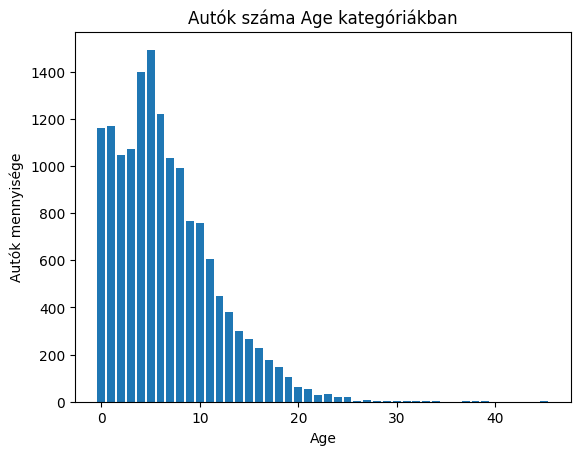

In [ ]:
age_counts = df['Age'].value_counts().sort_index()
plt.bar(age_counts.index, age_counts.values)
plt.xlabel('Age')
plt.ylabel('Autók mennyisége')
plt.title('Autók száma Age kategóriákban')
plt.show()

# 3. feladat
### 3.1 feladat

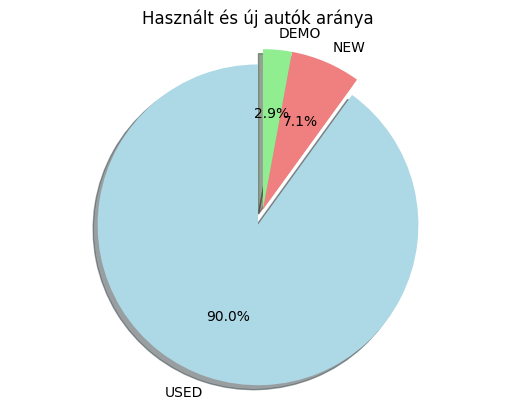

In [ ]:
used_new_counts = df['UsedOrNew'].value_counts()
labels = used_new_counts.index
sizes = used_new_counts.values
colors = ['lightblue', 'lightcoral', 'lightgreen']
explode = (0.1, 0, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.title('Használt és új autók aránya')
plt.show()

### 3.2 feladat

In [ ]:
from sklearn.preprocessing import LabelEncoder
text_cols = df.select_dtypes(include=['object']).columns

label_encoder = LabelEncoder()

for col in text_cols:
    df[col] = label_encoder.fit_transform(df[col])

# 4. feladat
### 4.1 feladat

In [ ]:
X = df.drop('Price', axis=1)
y = df['Price']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

X = df.drop('Price', axis=1)
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

### 4.2 feladat

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = rf_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")

Mean Absolute Error (MAE): 377.5907245016887
Mean Squared Error (MSE): 423363.1771223844
Root Mean Squared Error (RMSE): 650.6636436150281
R² Score: 0.5313591887544872


### 4.3 feladat

In [ ]:
from xgboost import XGBRegressor

xgb = XGBRegressor(n_estimators=100, learning_rate=0.3, max_depth=6)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
print(f"Mean Absolute Error (MAE): {mae_xgb}")
print(f"Mean Squared Error (MSE): {mse_xgb}")
print(f"Root Mean Squared Error (RMSE): {rmse_xgb}")
print(f"R² Score (XGBoost): {r2_xgb}")

Mean Absolute Error (MAE): 392.1463623046875
Mean Squared Error (MSE): 422852.0625
Root Mean Squared Error (RMSE): 650.2707609142518
R² Score (XGBoost): 0.5319249629974365


### 4.4 feladat

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)

mae_lin = mean_absolute_error(y_test, y_pred_lin)
mse_lin = mean_squared_error(y_test, y_pred_lin)
rmse_lin = np.sqrt(mse_lin)
r2_lin = r2_score(y_test, y_pred_lin)
print(f"Mean Absolute Error (MAE): {mae_lin}")
print(f"Mean Squared Error (MSE): {mse_lin}")
print(f"Root Mean Squared Error (RMSE): {rmse_lin}")
print(f"R² Score (Linear Regression): {r2_lin}")

Mean Absolute Error (MAE): 661.6855198404548
Mean Squared Error (MSE): 758369.8848164816
Root Mean Squared Error (RMSE): 870.844351659056
R² Score (Linear Regression): 0.16052435060543002


### 4.5 feladat
[VÁLASZ HELYE]

# 5. feladat
### 5.1 feladat

### 5.2 feladat
[VÁLASZ HELYE]

# 6. feladat
### 6.1 feladat